In [1]:
# import tools for analyzing timeseries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [18]:
# Load the dataset
file_path = 'AirPassengers.csv'
data = pd.read_csv(file_path, header=None)

# Display the first few rows of the dataset
data.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
# Rename columns and convert 'timestamp' to datetime
data.columns = ['timestamp', 'Passengers']
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [20]:
data.head()

,Passengers
timestamp,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


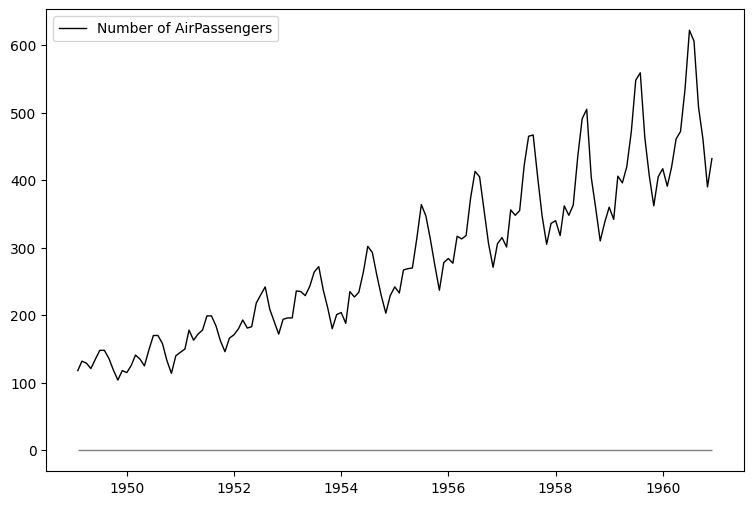

In [12]:
f, axes = plt.subplots(figsize=(9, 2*3))
axes.plot(data, color='black',linewidth=1,label='Number of AirPassengers')
axes.hlines(xmin=data.index[0],xmax=data.index[-1],y=0,color='gray',linewidth=1)
axes.legend()

The number of passenger looks like there is some trend(increasing) and doesn't have structual break </br> 
Thus it is reasonable to visually conclude that the number of spread is not stationary(because of trend) </br>
but also we can conclude that AR, ARMA model would well fit on our data</br>

We will use ADF and KPSS test for stationary check

In [21]:
# genrally in time series we use in-sample and out-sample as a term but I prefer train, test for code
train = data[:'1958-12-01']
test = data['1959-01-01':]

first we need to devide data to two part. In-sample and out sample. </br>
As Project Pdf said we use the first 10 years for estimation and rest of 2 years for one-step ahead forecasting


# Check Stationary

In [22]:
def adf_test(dataframe):
  result = adfuller(dataframe)
  print(f'Statistics: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'Critical values: {result[4]}')

adf_test(train)
print('---'*40)
#adf test null: serise is non stationary
#p-value가 0.05보다 작므면 기각(95%유의수준)
#critical value보다 작으면 기각(해당 유의수준내에서)

Statistics: -0.7734607708969381
p-value: 0.8267937485032447
Critical values: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
------------------------------------------------------------------------------------------------------------------------


In [23]:
def kpss_test(dataframe):
  result = kpss(dataframe)
  print(f'Statistics: {result[0]}')
  print(f'bounded p-value: {result[1]}')
  print(f'Critical values: {result[3]}')

kpss_test(train)
print('---'*40)

Statistics: 1.7058124992217791
bounded p-value: 0.01
Critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
------------------------------------------------------------------------------------------------------------------------


C:\Users\zin\AppData\Local\Temp\ipykernel_24644\1185079002.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(dataframe)


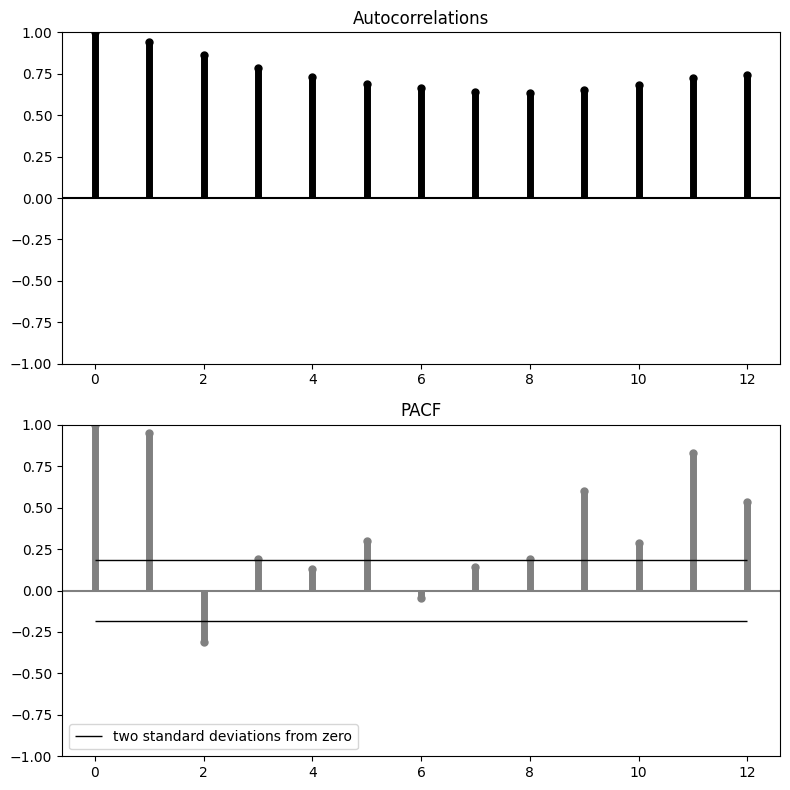

In [24]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 2*4))
plot_acf(train, lags=12, ax=axes[0], title='Autocorrelations', color='black',vlines_kwargs={'colors':'black','linewidth':5}, alpha=None)
plot_pacf(train, lags=12, ax=axes[1], method='ols', title='PACF', color='gray',vlines_kwargs={'colors':'gray','linewidth':5}, alpha=None)
axes[1].hlines(xmin=0,xmax=12,y=2*np.sqrt(1/len(train)),label='two standard deviations from zero',color='black',linewidth=1)
axes[1].hlines(xmin=0,xmax=12,y=-2*np.sqrt(1/len(train)),color='black',linewidth=1)
axes[1].legend()
plt.tight_layout()
plt.show()